In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [2]:
cadastre = gpd.read_file('data/SHP_CAD_BATIMENT_HORSOL/CAD_BATIMENT_HORSOL_reduced.shp')
cadastre.head()

,COMMUNE,NO_COMM,NO_BATIMEN,IDENT,EGID,NOMBAT,MUTNUM,DATEDT,DESTINATIO,NOMENCLATU,...,EPOQUE_CON,ANNEE_CONS,ANNEE_TRAN,NIVEAUX_HO,NIVEAUX_SS,HAUTEUR,SURFACE,SHAPE_AREA,SHAPE_LEN,geometry
0,Plan-les-Ouates,36,521,36:521,1023030,None,None,2006-01-20,Habitation un logement,1.1.1,...,Période de 1919 à 1945,0,0,2,0,10.54,78,77.929838,37.772700,"POLYGON ((2497683.270 1114311.191, 2497677.589..."
1,Lancy,31,F252,31:F252,1019214,None,381996,1996-07-19,Hab. deux logements,1.2.1,...,Période de 1961 à 1970,0,0,3,0,10.54,97,97.317817,40.519985,"POLYGON ((2499336.339 1114212.138, 2499328.804..."
2,Lancy,31,F228,31:F228,1019240,None,471960,2006-01-20,Habitation un logement,1.1.1,...,Période de 1946 à 1960,0,0,1,0,7.12,168,167.714119,63.166891,"POLYGON ((2499167.320 1114456.405, 2499182.833..."
3,Lancy,31,F204,31:F204,1019197,None,1301952,2006-01-20,Habitation un logement,1.1.1,...,Période de 1946 à 1960,0,0,2,0,8.95,74,73.858931,36.075424,"POLYGON ((2498737.411 1114265.648, 2498732.926..."
4,Plan-les-Ouates,36,1591,36:1591,1024000,None,0422019,2021-02-04,Habitation un logement,1.1.1,...,Période de 1946 à 1960,0,0,1,0,8.43,104,103.885034,46.285117,"POLYGON ((2498531.474 1113605.824, 2498531.623..."


In [3]:
capacite_100 = gpd.read_file('data/SHP_SCANE_CAPACITE_100/SCANE_CAPACITE_100.shp')
capacite_100.head()
capacite_100.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CAPACITE    715 non-null    object  
 1   LIEN_PDF    715 non-null    object  
 2   SHAPE_AREA  715 non-null    float64 
 3   SHAPE_LEN   715 non-null    float64 
 4   geometry    714 non-null    geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 28.1+ KB


In [4]:
# from https://stackoverflow.com/questions/67618097/how-to-convert-string-of-range-bins-into-numerical-values-that-can-then-be-us

for col in ["CAPACITE"]:
    capacite_100_int = capacite_100.join(
        capacite_100[col]
        .str.replace(".", "", regex=False)
        .str.extract(pat=r"^[$]*(\d+)[-\s$]*(\d+)$")
        .astype("float")
        .rename({0: f"{col}_lower", 1: f"{col}_upper"}, axis="columns")
    )
capacite_100_int['CAPACITE_lower']= capacite_100_int['CAPACITE_lower'].divide(10)
capacite_100_int['CAPACITE_upper']= capacite_100_int['CAPACITE_upper'].divide(10)
capacite_100_int

,CAPACITE,LIEN_PDF,SHAPE_AREA,SHAPE_LEN,geometry,CAPACITE_lower,CAPACITE_upper
0,2.2 - 2.3,http://etat.geneve.ch/dt/energie/a_votre_servi...,2.155487e+03,242.415729,"POLYGON ((2502623.740 1132902.017, 2502623.683...",2.2,2.3
1,2.2 - 2.3,http://etat.geneve.ch/dt/energie/a_votre_servi...,7.427783e+03,524.400036,"POLYGON ((2502410.740 1132889.017, 2502410.586...",2.2,2.3
2,2.3 - 2.4,http://etat.geneve.ch/dt/energie/a_votre_servi...,7.521356e+05,5210.696748,"POLYGON ((2502423.740 1134252.017, 2502423.925...",2.3,2.4
3,2.2 - 2.3,http://etat.geneve.ch/dt/energie/a_votre_servi...,2.316059e+05,3514.841272,"POLYGON ((2505493.740 1132517.017, 2505493.612...",2.2,2.3
4,2.1 - 2.2,http://etat.geneve.ch/dt/energie/a_votre_servi...,2.590080e+06,11360.004015,"POLYGON ((2503693.740 1133677.017, 2503693.790...",2.1,2.2
...,...,...,...,...,...,...,...
710,2.3 - 2.4,http://etat.geneve.ch/dt/energie/a_votre_servi...,4.208356e+03,458.544909,"POLYGON ((2485423.740 1109467.017, 2485398.740...",2.3,2.4
711,2.2 - 2.3,http://etat.geneve.ch/dt/energie/a_votre_servi...,8.498303e+04,2180.217564,"POLYGON ((2485453.740 1109467.017, 2485423.740...",2.2,2.3
712,2.3 - 2.4,http://etat.geneve.ch/dt/energie/a_votre_servi...,1.610944e+04,1262.145434,"POLYGON ((2485478.740 1109467.017, 2485453.740...",2.3,2.4
713,2.4 - 2.5,http://etat.geneve.ch/dt/energie/a_votre_servi...,4.585446e+04,1314.233275,"POLYGON ((2485478.740 1109467.017, 2485478.793...",2.4,2.5


In [5]:
capacite_100_int = capacite_100_int[['CAPACITE','geometry','CAPACITE_lower','CAPACITE_upper']]
capacite_100_int.head()

,CAPACITE,geometry,CAPACITE_lower,CAPACITE_upper
0,2.2 - 2.3,"POLYGON ((2502623.740 1132902.017, 2502623.683...",2.2,2.3
1,2.2 - 2.3,"POLYGON ((2502410.740 1132889.017, 2502410.586...",2.2,2.3
2,2.3 - 2.4,"POLYGON ((2502423.740 1134252.017, 2502423.925...",2.3,2.4
3,2.2 - 2.3,"POLYGON ((2505493.740 1132517.017, 2505493.612...",2.2,2.3
4,2.1 - 2.2,"POLYGON ((2503693.740 1133677.017, 2503693.790...",2.1,2.2


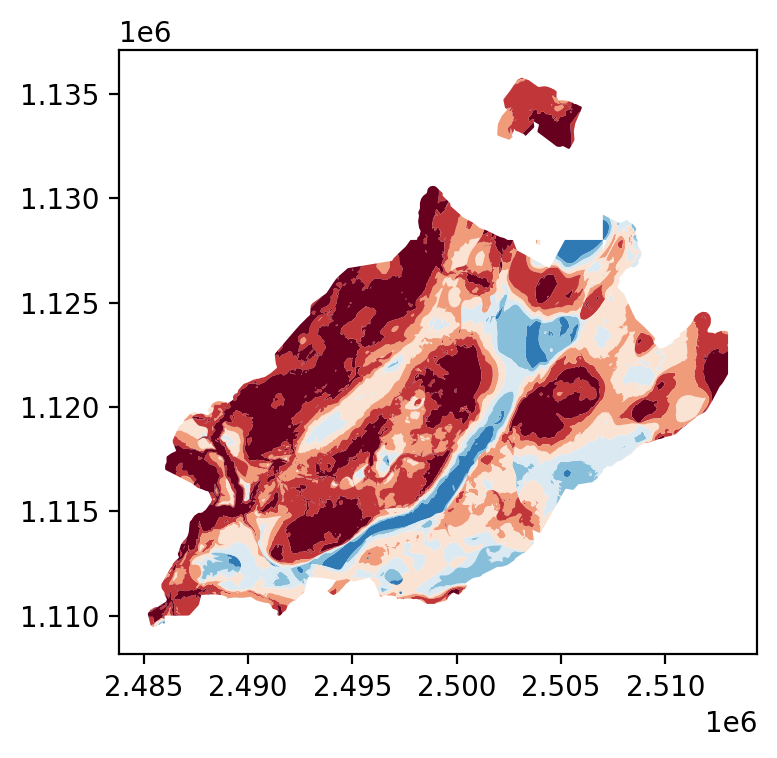

In [6]:
im = capacite_100_int.plot('CAPACITE_upper', cmap='RdBu')


In [8]:

join_left_df = cadastre.sjoin(capacite_100_int, how="left")


In [9]:
join_left_df.head()

,COMMUNE,NO_COMM,NO_BATIMEN,IDENT,EGID,NOMBAT,MUTNUM,DATEDT,DESTINATIO,NOMENCLATU,...,NIVEAUX_SS,HAUTEUR,SURFACE,SHAPE_AREA,SHAPE_LEN,geometry,index_right,CAPACITE,CAPACITE_lower,CAPACITE_upper
0,Plan-les-Ouates,36,521,36:521,1023030,None,None,2006-01-20,Habitation un logement,1.1.1,...,0,10.54,78,77.929838,37.772700,"POLYGON ((2497683.270 1114311.191, 2497677.589...",610,2.5 - 2.6,2.5,2.6
0,Plan-les-Ouates,36,521,36:521,1023030,None,None,2006-01-20,Habitation un logement,1.1.1,...,0,10.54,78,77.929838,37.772700,"POLYGON ((2497683.270 1114311.191, 2497677.589...",604,2.7 - 2.8,2.7,2.8
1,Lancy,31,F252,31:F252,1019214,None,381996,1996-07-19,Hab. deux logements,1.2.1,...,0,10.54,97,97.317817,40.519985,"POLYGON ((2499336.339 1114212.138, 2499328.804...",570,2.3 - 2.4,2.3,2.4
2,Lancy,31,F228,31:F228,1019240,None,471960,2006-01-20,Habitation un logement,1.1.1,...,0,7.12,168,167.714119,63.166891,"POLYGON ((2499167.320 1114456.405, 2499182.833...",657,2.4 - 2.5,2.4,2.5
3,Lancy,31,F204,31:F204,1019197,None,1301952,2006-01-20,Habitation un logement,1.1.1,...,0,8.95,74,73.858931,36.075424,"POLYGON ((2498737.411 1114265.648, 2498732.926...",610,2.5 - 2.6,2.5,2.6


<AxesSubplot:>

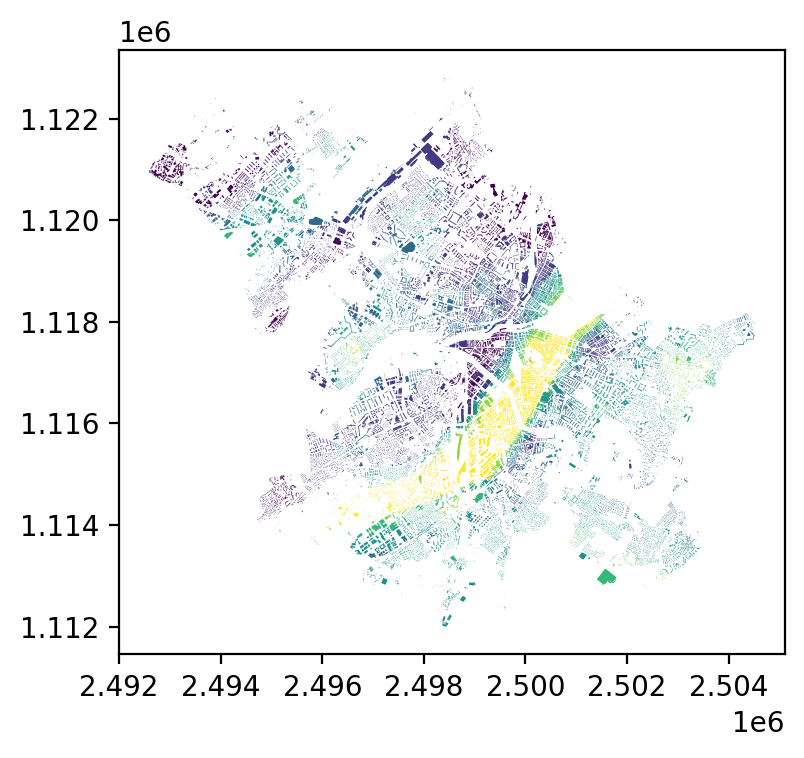

In [10]:
join_left_df.plot('CAPACITE_lower')

In [12]:
join_left_df_4326 = join_left_df.to_crs(epsg='4326')
join_left_df_4326 = join_left_df_4326.drop_duplicates(subset=['EGID'])

join_left_df_4326 = join_left_df_4326.set_crs('epsg:4326')
join_left_df_4326.to_file('data/CDST_CAPC_4326_light.shp')

/var/folders/fc/40b_clln34l1w72_6wv05b_c0000gn/T/ipykernel_68100/1076698785.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  join_left_df_4326.to_file('data/CDST_CAPC_4326_light.shp')


In [13]:
import jenkspy


In [15]:
breaks = jenkspy.jenks_breaks(join_left_df_4326['CAPACITE_lower'], nb_class=5)
print(breaks)

[2.1, 2.2, 2.3, 2.4, 2.5, 2.7]


In [16]:
pd.qcut(join_left_df_4326['CAPACITE_lower'], q=4)

0          (2.4, 2.7]
1          (2.2, 2.3]
2          (2.3, 2.4]
3          (2.4, 2.7]
4          (2.4, 2.7]
             ...     
42275    (2.099, 2.2]
42276    (2.099, 2.2]
42277    (2.099, 2.2]
42278    (2.099, 2.2]
42279    (2.099, 2.2]
Name: CAPACITE_lower, Length: 42280, dtype: category
Categories (4, interval[float64, right]): [(2.099, 2.2] < (2.2, 2.3] < (2.3, 2.4] < (2.4, 2.7]]

In [35]:
# breaks = pd.qcut(join_left_df_4326['CAPACITE_lower'], bins=jenkspy.jenks_breaks(join_left_df_4326['CAPACITE_lower'], nb_class=4),include_lowest=True)


join_left_df_4326['fill_color'] = pd.cut(
    join_left_df_4326['CAPACITE_lower'],
    bins=jenkspy.jenks_breaks(join_left_df_4326['CAPACITE_lower'], nb_class=4),
    labels=['[44,123,182]', '[171,217,233]', '[253,174,97]', '[215,25,28]'],
    include_lowest=True)



In [36]:
join_left_df_4326.to_file('data/CDST_CAPC_4326_light.shp')

TypeError: Cannot interpret 'CategoricalDtype(categories=['[44,123,182]', '[171,217,233]', '[253,174,97]',
                  '[215,25,28]'],
, ordered=True)' as a data type

In [34]:
breaks

0         [253,174,97]
1        [171,217,233]
2         [253,174,97]
3         [253,174,97]
4         [253,174,97]
             ...      
42275     [44,123,182]
42276     [44,123,182]
42277     [44,123,182]
42278     [44,123,182]
42279     [44,123,182]
Name: CAPACITE_lower, Length: 42280, dtype: category
Categories (4, object): ['[44,123,182]' < '[171,217,233]' < '[253,174,97]' < '[215,25,28]']

In [19]:
li = [(2.099, 2.2] < (2.2, 2.3] < (2.3, 2.4] < (2.4, 2.7]]
for i,b in enumerate(li):
    print(i,b)


# def color_scale(val):
#     for i, b in enumerate(BREAKS):
#         if val < b:
#             return COLOR_RANGE[i]
#     return COLOR_RANGE[i]

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (604956894.py, line 1)

In [20]:
import matplotlib
from matplotlib.cm import cool

def get_n_colors(n):
    return[ cool(float(i)/n) for i in range(n) ]

In [29]:
num_categories = len(set(breaks))
num_categories
from matplotlib.cm import viridis
colors = [viridis(float(i)/num_categories) for i in breaks]
plt.scatter(x, y, color=colors)

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

In [18]:
join_left_df[['COMMUNE','EGID','geometry','CAPACITE','DATEDT']].to_file('data/cadastr_capacite.json', driver="GeoJSON")  


In [30]:
import math

import pandas as pd
import pydeck as pdk

# Load in the JSON data
DATA_URL = "https://raw.githubusercontent.com/visgl/deck.gl-data/master/examples/geojson/vancouver-blocks.json"
json = pd.read_json(DATA_URL)
df = pd.DataFrame()

# Custom color scale
COLOR_RANGE = [
    [65, 182, 196],
    [127, 205, 187],
    [199, 233, 180],
    [237, 248, 177],
    [255, 255, 204],
    [255, 237, 160],
    [254, 217, 118],
    [254, 178, 76],
    [253, 141, 60],
    [252, 78, 42],
    [227, 26, 28],
    [189, 0, 38],
    [128, 0, 38],
]

BREAKS = [-0.6, -0.45, -0.3, -0.15, 0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1.05, 1.2]


def color_scale(val):
    for i, b in enumerate(BREAKS):
        if val < b:
            return COLOR_RANGE[i]
    return COLOR_RANGE[i]


def calculate_elevation(val):
    return math.sqrt(val) * 10


# Parse the geometry out in Pandas
df["coordinates"] = json["features"].apply(lambda row: row["geometry"]["coordinates"])
df["valuePerSqm"] = json["features"].apply(lambda row: row["properties"]["valuePerSqm"])
df["growth"] = json["features"].apply(lambda row: row["properties"]["growth"])
df["elevation"] = json["features"].apply(lambda row: calculate_elevation(row["properties"]["valuePerSqm"]))
df["fill_color"] = json["features"].apply(lambda row: color_scale(row["properties"]["growth"]))

In [38]:
df.head()

,coordinates,valuePerSqm,growth,elevation,fill_color
0,"[[[-123.0249569, 49.240719], [-123.0241582, 49...",4563,0.3592,675.499815,"[254, 178, 76]"
1,"[[[-123.0713722, 49.2720583], [-123.069715, 49...",2270,0.2653,476.445170,"[254, 217, 118]"
2,"[[[-123.0716588, 49.2715175], [-123.0733174, 4...",4338,0.2906,658.634952,"[254, 217, 118]"
3,"[[[-123.0746276, 49.2715849], [-123.0758105, 4...",3834,0.7270,619.193023,"[252, 78, 42]"
4,"[[[-123.0753056, 49.2686511], [-123.0736492, 4...",6597,0.2703,812.219182,"[254, 217, 118]"


In [35]:
join_left_df_2056 = join_left_df[['COMMUNE','EGID','geometry','CAPACITE','DATEDT']]
join_left_df_4326 = join_left_df_2056.to_crs(epsg='4326')


In [24]:
join_left_df_4326.to_file('data/CDST_CAPC_4326.json', driver="GeoJSON")  

In [36]:
join_left_df_4326.reset_index(inplace=True)
print(join_left_df_4326.info())
# join_left_df_4326.to_csv('data/CDST_CAPC_4326.csv', index=False)

join_left_df_4326_light = join_left_df_4326.drop_duplicates(subset=['EGID'])
join_left_df_4326_light.reset_index(inplace=True)
print(join_left_df_4326_light.info())
# join_left_df_4326.to_csv('data/CDST_CAPC_4326_light.csv', index=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 86924 entries, 0 to 86923
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   index     86924 non-null  int64   
 1   COMMUNE   86924 non-null  object  
 2   EGID      86924 non-null  int64   
 3   geometry  86924 non-null  geometry
 4   CAPACITE  86924 non-null  object  
 5   DATEDT    86922 non-null  object  
dtypes: geometry(1), int64(2), object(3)
memory usage: 4.0+ MB
None
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 82256 entries, 0 to 82255
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   level_0   82256 non-null  int64   
 1   index     82256 non-null  int64   
 2   COMMUNE   82256 non-null  object  
 3   EGID      82256 non-null  int64   
 4   geometry  82256 non-null  geometry
 5   CAPACITE  82256 non-null  object  
 6   DATEDT    82255 non-null  object  
dtypes: geometry(1),

In [39]:
join_left_df_4326_light.to_file('data/CDST_CAPC_4326_light.json', driver="GeoJSON")

In [41]:
join_left_df_4326_light = join_left_df_4326_light.set_crs('epsg:4326')
join_left_df_4326_light.to_file('data/CDST_CAPC_4326_light.shp')

In [42]:
join_left_df_4326_light.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 82256 entries, 0 to 82255
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   level_0   82256 non-null  int64   
 1   index     82256 non-null  int64   
 2   COMMUNE   82256 non-null  object  
 3   EGID      82256 non-null  int64   
 4   geometry  82256 non-null  geometry
 5   CAPACITE  82256 non-null  object  
 6   DATEDT    82255 non-null  object  
dtypes: geometry(1), int64(3), object(3)
memory usage: 4.4+ MB


In [22]:
from urllib.request import urlopen
import json
# with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
#     counties = json.load(response)
f = open('data/CDST_CAPC_4326.json')
cadastre_capacite = json.load(f)
import pandas as pd
# df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
#                    dtype={"fips": str})
df = join_left_df[['COMMUNE','EGID','CAPACITE','DATEDT']]
import plotly.express as px

In [16]:
fig = px.choropleth_mapbox(df, geojson=counties, locations='EGID', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=12, center = {"lat": 46.2044, "lon": 6.1432},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.show()